<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%23Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = keras.models.load_model('/content/model1.h5')
model2 = keras.models.load_model('/content/model2.h5')
model3 = keras.models.load_model('/content/model3.h5')
model4 = keras.models.load_model('/content/model4.h5')

In [3]:
#с диска
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model1.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model2.h5')
model3 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model3.h5')
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model4.h5')

# **Нейронные сети с различным числом нейронов на скрытом слое [30; 1'500; 5'000; 10'000]**



Коэфициент корреляции Пирсона (линейный коэфициент корреляции)

In [ ]:
weight_origin2=model.layers[2].kernel
print(weight_origin2.shape)

(784, 30)


(30, 784)
(1500, 784)
(5000, 784)
(10000, 784)


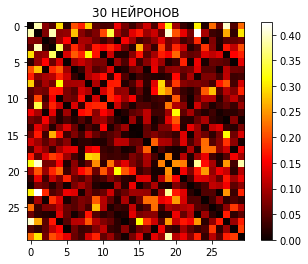

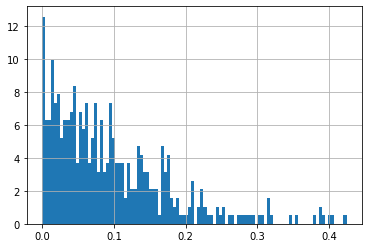

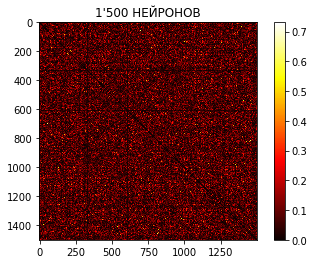

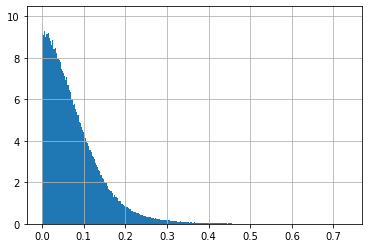

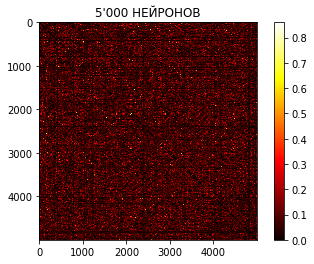

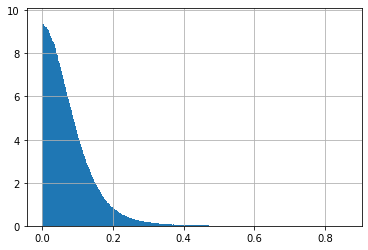

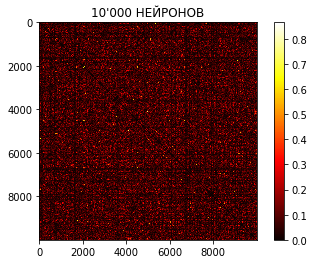

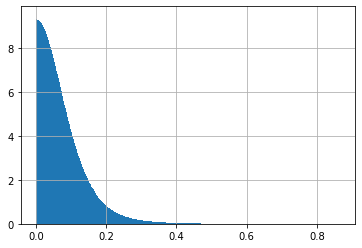

In [4]:
for i in range(4):
  if i==0:
    #weight_origin2=model.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model.layers[2].kernel)
    plt.figure()
    plt.title("30 НЕЙРОНОВ")
    #net1 = np.zeros(y) 
    T0 = 0.25
    bins=100
  if i==1: 
    #weight_origin2=model2.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model2.layers[2].kernel)
    plt.figure()
    plt.title("1'500 НЕЙРОНОВ")
    #net2 = np.zeros(y) 
    bins=1000
  if i==2: 
    #weight_origin2=model3.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model3.layers[2].kernel)
    plt.figure()
    plt.title("5'000 НЕЙРОНОВ")
    #net3 = np.zeros(y) 
    bins=1000
  if i==3: 
    #weight_origin2=model4.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model4.layers[2].kernel)
    plt.figure()
    plt.title("10'000 НЕЙРОНОВ")
    #net4 = np.zeros(y) 
    bins=1000
  
  (y,z) = weight_origin2.shape
  print(weight_origin2.shape)
  m = np.zeros((y,y))
  m = abs(np.corrcoef(weight_origin2))
  for j in range(y):
    m[j][j]=0

  plt.imshow(m, cmap='hot', interpolation='nearest')
  plt.colorbar()

  plt.figure()
  a = m.flatten()
  plt.hist(a,bins,density=True)
  plt.grid(True)


# #TASK 9

In [41]:
similars = []

for i in range(4):
  if i==0:
    print('30 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model.layers[2].kernel)
  if i==1: 
    print('1500 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model2.layers[2].kernel)
  if i==2: 
    print('5000 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model3.layers[2].kernel)
  if i==3: 
    print('10000 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model4.layers[2].kernel)
  
  (y,z) = weight_origin2.shape
  print(weight_origin2.shape)
  am = np.zeros((y,y))
  am = abs(np.corrcoef(weight_origin2))
  np.fill_diagonal(am,0)
  mask = am > 0.5

  similar = {} #представляют тип данных словаря dict, а словарь состоит из групп значений пар ключей
  for idx, k in enumerate(mask):
    nk = k.nonzero()[0]
    if len(nk) != 0:
      similar[idx] = nk[np.argmax(am[idx,nk])]
  
  print("> 0.5")
  print(len(similar))

  mask = am > 0.7 #{true; false}

  similar = {}
  for idx, k in enumerate(mask):  #до длины маски (по количеству нейронов на скрытом слое)
    #k - значение маски (true или false)
    nk = k.nonzero()[0] #возвращает индекс элементa массива
    if len(nk) != 0:  #если значение было не ЛОЖЬ и nk имеет значение индекса
      #первый элемент пары - индекс нейрона, второй - из матрицы corrcoef
      similar[idx] = nk[np.argmax(am[idx,nk])]
      #print('test')
      #print(idx) #индекс нейрона
      #print(nk)  #индекс нейрона
      #print(nk[np.argmax(am[idx,nk])]) #максимальное значение в этих индексах? они ведь не более 0.7. ИЛИ...
                                        #ЭТО ИНДЕКС ВТОРОГО НЕЙРОНА ИЗ ПАРЫ НАИБОЛЕЕ ПОХОЖИХ? они зеркальны.
  
  similars.append(similar)
  print("> 0.7")
  print(len(similar))

30 НЕЙРОНОВ:
(30, 784)
> 0.5
0
> 0.7
0
1500 НЕЙРОНОВ:
(1500, 784)
> 0.5
431
> 0.7
6
5000 НЕЙРОНОВ:
(5000, 784)
> 0.5
2911
> 0.7
221
10000 НЕЙРОНОВ:
(10000, 784)
> 0.5
6307
> 0.7
764


**ВЫВОД: НА ВЫХОД ПОЛУЧАЕМ СТРУКТУРУ ДЛЯ 4Х СЕТЕЙ, СОДЕРЖАЩУЮ ПАРЫ (КЛЮЧИ) НАИБОЛЕЕ ПОХОЖИХ НЕЙРОНОВ. ЭТИ ПАРЫ И НАДО СКЛАДЫВАТЬ(?)**

In [33]:
print(similars[1])

{265: 579, 437: 1437, 579: 265, 786: 920, 920: 786, 1437: 437}


In [42]:
print(similars[2])

{15: 1457, 82: 3376, 116: 3099, 171: 2429, 173: 1152, 191: 3369, 202: 4647, 220: 893, 221: 2475, 239: 317, 246: 3818, 260: 2564, 270: 3573, 290: 4525, 317: 239, 344: 3216, 433: 2039, 440: 4794, 508: 4647, 536: 3579, 555: 1792, 638: 4229, 649: 2882, 652: 4650, 701: 3528, 719: 1034, 763: 1917, 777: 2977, 815: 3752, 842: 2732, 860: 1579, 873: 763, 893: 220, 925: 4863, 946: 3581, 977: 1003, 978: 3238, 980: 3852, 1003: 977, 1016: 2665, 1033: 4329, 1034: 719, 1095: 763, 1124: 3872, 1152: 173, 1359: 2710, 1457: 15, 1497: 4141, 1518: 4211, 1546: 3369, 1576: 3233, 1579: 860, 1626: 2371, 1631: 3796, 1706: 2863, 1733: 4221, 1744: 270, 1761: 4198, 1780: 3975, 1792: 555, 1830: 4642, 1847: 173, 1895: 3293, 1909: 4649, 1917: 763, 1956: 763, 1998: 4744, 2005: 860, 2010: 3066, 2022: 4141, 2039: 433, 2103: 2965, 2105: 4567, 2149: 3125, 2161: 4283, 2181: 4525, 2184: 2641, 2213: 4492, 2226: 4063, 2248: 2868, 2265: 2992, 2298: 4360, 2310: 4249, 2371: 1626, 2408: 3160, 2411: 4283, 2416: 1895, 2429: 171, 245

ЦИКЛ УВЕЛИЧЕНИЕ ВЕСОВ ПО ПАРАМ

In [48]:
#чтобы не затирать изначальные модели, копируем их в новый список
models_plus = []
models_plus.append(model)
models_plus.append(model2)
models_plus.append(model3)
models_plus.append(model4)


In [83]:
text = ['30', '1 500', '5 000', '10 000']

for i in range(4):
  print('-------------------------------------------------------------')
  print(text[i], ' НЕЙРОНОВ:')
  print('out layer (kernel,bias)')
  #INPUT LAYER
  w = np.transpose(models_plus[i].layers[2].kernel)
  b = np.transpose(models_plus[i].layers[2].bias)
  print(w.shape)
  print(b.shape)
  #находим
  for num, value in enumerate(similars[i]):
    # value - ключ
    # similars[i].get(value) - значение по ключу (второй нейрон)
    #print(value,similars[i].get(value))
    #если прибавление идет от большего нейрона к меньшему, то выполняем
    if (value < similars[i].get(value)): 
      w[value] = w[value] + w[similars[i].get(value)]
      b[value] = b[value] + b[similars[i].get(value)]
    #иначе сложение уже было и просто приравниваем значения
    else : 
      w[value] = w[similars[i].get(value)]
      b[value] = b[similars[i].get(value)]
  #заполняем
  models_plus[i].layers[2].set_weights([np.transpose(w), np.transpose(b)])
  
  #OUTPUT LAYER
  print('out layer (kernel,bias)')
  w = np.transpose(models_plus[i].layers[3].kernel)
  w = np.transpose(w) #иначе неправильный тип получается
  b = (models_plus[i].layers[3].bias)
  print(w.shape)
  print(b.shape)
  #находим
  for num, value in enumerate(similars[i]):
    # value - ключ
    # similars[i].get(value) - значение по ключу (второй нейрон)
    #print(value,similars[i].get(value))
    #если прибавление идет от большего нейрона к меньшему, то выполняем
    if (value < similars[i].get(value)): 
      w[value] = w[value] + w[similars[i].get(value)]
    #иначе сложение уже было и просто приравниваем значения
    else : 
      w[value] = w[similars[i].get(value)]
  #заполняем
  models_plus[i].layers[3].set_weights([w, b])


-------------------------------------------------------------
30  НЕЙРОНОВ:
out layer (kernel,bias)
(30, 784)
(30,)
out layer (kernel,bias)
(30, 10)
(10,)
-------------------------------------------------------------
1 500  НЕЙРОНОВ:
out layer (kernel,bias)
(1500, 784)
(1500,)
out layer (kernel,bias)
(1500, 10)
(10,)
-------------------------------------------------------------
5 000  НЕЙРОНОВ:
out layer (kernel,bias)
(5000, 784)
(5000,)
out layer (kernel,bias)
(5000, 10)
(10,)
-------------------------------------------------------------
10 000  НЕЙРОНОВ:
out layer (kernel,bias)
(10000, 784)
(10000,)
out layer (kernel,bias)
(10000, 10)
(10,)


In [82]:
#смотрим результат
for  i in range(4):
  scores = models_plus[i].evaluate(X_test, Y_test, verbose=0);
  print(i+1, 'СЕТЬ. Изменено нейронов: ', len(similars[i]))
  print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))  

1 СЕТЬ. Изменено нейронов:  0
Точность работы на тестовых данных: 96.97%
2 СЕТЬ. Изменено нейронов:  6
Точность работы на тестовых данных: 35.86%
3 СЕТЬ. Изменено нейронов:  221
Точность работы на тестовых данных: 79.90%
4 СЕТЬ. Изменено нейронов:  764
Точность работы на тестовых данных: 94.99%
